In [1]:
import numpy as np

In [2]:
N = 10000
M = 10

In [3]:
a = np.zeros((N, 1, 3))
b = np.zeros((N, 1, 3))
c = np.zeros((N, 1, 3))

In [4]:
a[:, :, :1] = np.random.random((N, 1, 1))
b[:, :, :2] = np.random.random((N, 1, 2))
c[:, :, :3] = np.random.random((N, 1, 3))

In [5]:
lattices = np.concatenate([a, b, c], axis = 1)

In [6]:
mesh = list(range(-M, M+1))
multipliers = np.stack(np.meshgrid(mesh, mesh, mesh)).transpose().reshape(-1, 3)

In [7]:
lattices.shape

(10000, 3, 3)

In [8]:
multipliers.shape

(9261, 3)

In [9]:
lattice_points = np.einsum('ijk,lj->ilk', lattices, multipliers)

In [10]:
lattice_lengths = np.linalg.norm(lattice_points, axis = -1)

In [11]:
lattice_lengths.shape

(10000, 9261)

In [12]:
idx_sorts = np.argsort(lattice_lengths, axis = -1)

In [13]:
sort_multipliers = multipliers[idx_sorts]

In [14]:
sort_multipliers.shape

(10000, 9261, 3)

In [15]:
top_multipliers = []
for sort_multiplier in sort_multipliers:
    top_multiplier = []
    i = 0
    while True:
        i += 1
        m = sort_multiplier[i]
        multiple = False
        if len(top_multiplier) == 3:
            break
        elif len(top_multiplier) == 1:
            if np.linalg.norm(np.cross(m, top_multiplier[0])) == 0:
                multiple = True
        elif len(top_multiplier) == 2:
            if np.dot(m, np.cross(top_multiplier[0], top_multiplier[1])) == 0:
                multiple = True
        if multiple:
            continue
        else:
            top_multiplier.append(m)
    top_multipliers.append(top_multiplier)
        

In [16]:
top_multipliers = np.array(top_multipliers)

In [17]:
top_multipliers.shape

(10000, 3, 3)

In [18]:
lattices.shape

(10000, 3, 3)

In [19]:
new_lattice = np.matmul(top_multipliers, lattices)

In [20]:
new_lattice[0]

array([[0.26202372, 0.12484738, 0.57580638],
       [0.66378859, 0.        , 0.        ],
       [0.32590545, 0.59245798, 0.        ]])

In [21]:
new_a = np.linalg.norm(new_lattice[:, 0], axis = -1)
new_b = np.linalg.norm(new_lattice[:, 1], axis = -1)
new_c = np.linalg.norm(new_lattice[:, 2], axis = -1)
new_alp = np.arccos(np.einsum('ij,ij->i', new_lattice[:, 1], new_lattice[:, 2])/new_b/new_c)*180/np.pi
new_bet = np.arccos(np.einsum('ij,ij->i', new_lattice[:, 2], new_lattice[:, 0])/new_c/new_a)*180/np.pi
new_gam = np.arccos(np.einsum('ij,ij->i', new_lattice[:, 0], new_lattice[:, 1])/new_a/new_b)*180/np.pi

In [22]:
new_V = np.abs(np.einsum('ij,ij->i', np.cross(new_lattice[:, 0], new_lattice[:, 1]), new_lattice[:, 2]))

In [23]:
import matplotlib.pyplot as plt

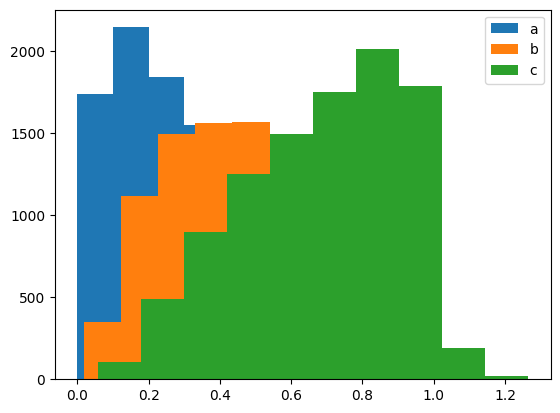

In [24]:
plt.figure()
plt.hist(new_a, label = 'a')
plt.hist(new_b, label = 'b')
plt.hist(new_c, label = 'c')
plt.legend()
plt.show()

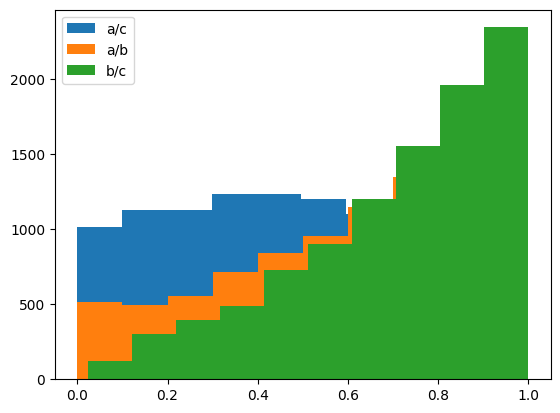

In [25]:
plt.figure()
plt.hist(new_a/new_c, label = 'a/c')
plt.hist(new_a/new_b, label = 'a/b')
plt.hist(new_b/new_c, label = 'b/c')
plt.legend()
plt.show()

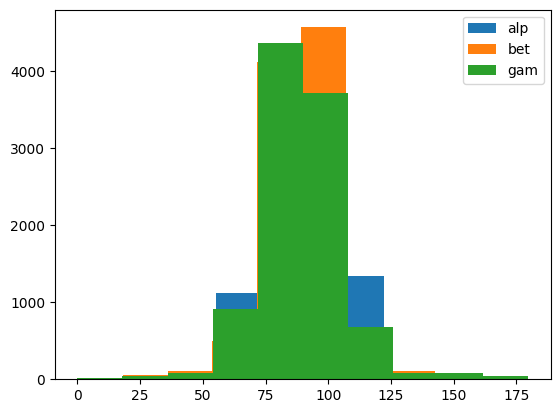

In [26]:
plt.figure()
plt.hist(new_alp, label = 'alp')
plt.hist(new_bet, label = 'bet')
plt.hist(new_gam, label = 'gam')
plt.legend()
plt.show()

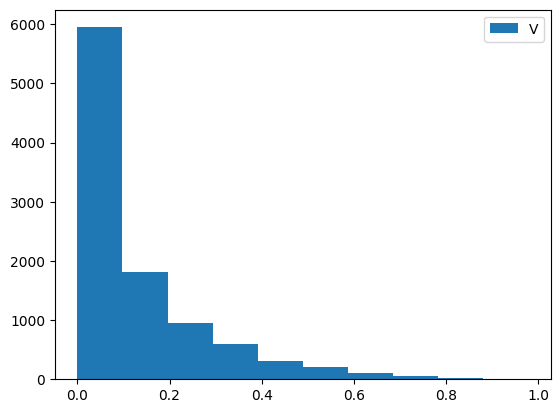

In [27]:
plt.figure()
plt.hist(new_V, label = 'V')
plt.legend()
plt.show()

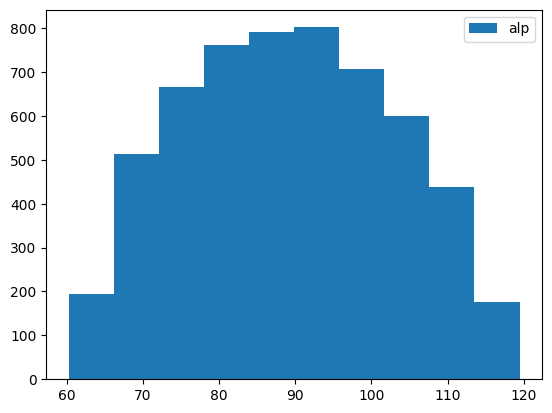

In [36]:
plt.figure()
plt.hist(new_alp[new_V>0.05], label = 'alp')
plt.legend()
plt.show()

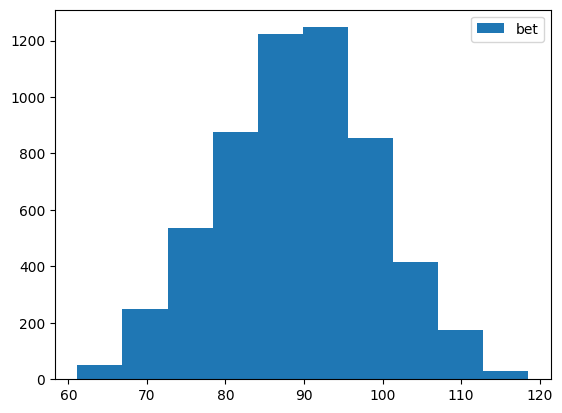

In [37]:
plt.figure()
plt.hist(new_bet[new_V>0.05], label = 'bet')
plt.legend()
plt.show()

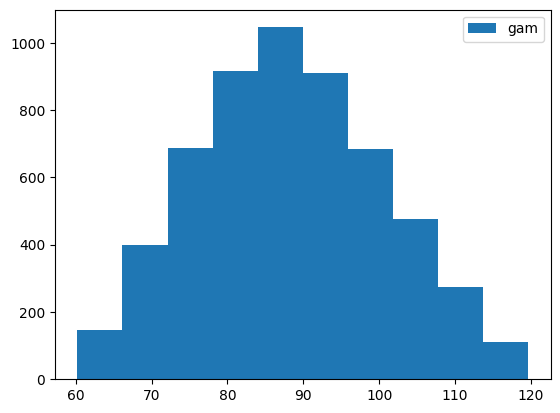

In [38]:
plt.figure()
plt.hist(new_gam[new_V>0.05], label = 'gam')
plt.legend()
plt.show()

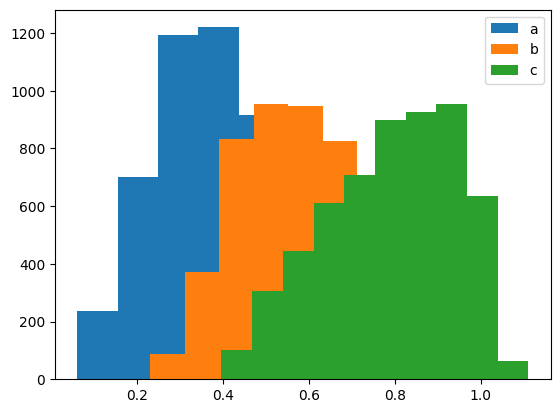

In [39]:
plt.figure()
plt.hist(new_a[new_V>0.05], label = 'a')
plt.hist(new_b[new_V>0.05], label = 'b')
plt.hist(new_c[new_V>0.05], label = 'c')
plt.legend()
plt.show()

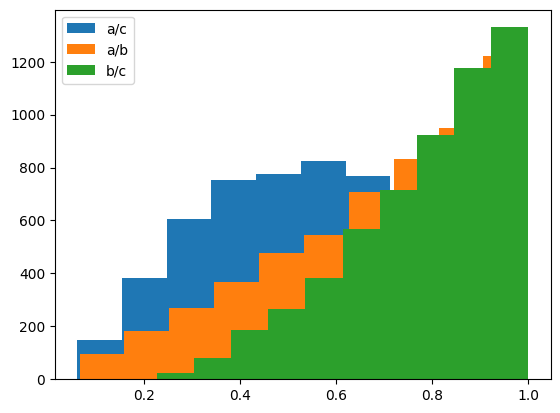

In [40]:
plt.figure()
plt.hist(new_a[new_V>0.05]/new_c[new_V>0.05], label = 'a/c')
plt.hist(new_a[new_V>0.05]/new_b[new_V>0.05], label = 'a/b')
plt.hist(new_b[new_V>0.05]/new_c[new_V>0.05], label = 'b/c')
plt.legend()
plt.show()